<a href="https://colab.research.google.com/github/yuce-8/alpha/blob/main/YUCE_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YUCE-8.tech API documentation
**THIS IS FOR EDUCATIONAL / RESEARCH & DEVELOPMENT PURPOSES ONLY!**


In [23]:
from __future__ import absolute_import, division, print_function, unicode_literals
!pip install requests

import json
import requests
import urllib3

## Connect to YUCE-8
this is subject to change in the next versions

In [12]:
class GCF():
  def __init__(self):
    self.url = 'https://us-central1-yuce-8-v1.cloudfunctions.net/yuce_8_alpha_2_api'
    print('YUCE-8 ready @ ', self.url)

  def push(self, json_obj, return_result=False):
    r = requests.post(self.url, json=json_obj)
    if return_result:
      return r

yuce_8 = GCF()

YUCE-8 ready @  https://us-central1-yuce-8-v1.cloudfunctions.net/yuce_8_alpha_2_api


## Test connection
the test will return the current backend version

In [13]:
def get_current_backend_version():
   req = yuce_8.push({'action': 'get_version'}, return_result=True)
   if req.status_code == 200:
     return req.json()['msg']
   else:
     return ';-( ' + req.json()['msg']


print(get_current_backend_version())

v0.1.4 alpha


## Create a test key
Key can be reused for 50 calls

In [14]:
def create_test_key(your_mail_address):
   req = yuce_8.push({'action': 'create_test_license', 'user_name': your_mail_address}, return_result=True)
   if req.status_code == 200:
     return req.json()['msg']
   else:
     return ';-( ' + req.json()['msg']



key = create_test_key('hans@yuce-8.info')
print('our new key = ', key)

our new key =  543e6a4a-0086-4f4b-afe8-7513bb8ac990


## List all available forecasts

In [15]:
def get_available_forecasts():
   req = yuce_8.push({'action': 'get_available_forecasts'}, return_result=True)
   if req.status_code == 200:
     return req.json()['msg']
   else:
     return ';-( ' + req.json()['msg']

get_available_forecasts()

[{'BTC-USD': ['1d', '4hour'], '^GSPC': ['1d', '4hour']}]

## Get latest forecast

In [16]:
def get_latest_forecast(key, symbol, interval):
   req = yuce_8.push(
      {
        'action': 'get_forecast',
        'key': key,
        'symbol': symbol,
        'interval': interval
      }, return_result=True)
   if req.status_code == 200:
     return req.json()['msg']['f_0']['yuce_8'], req.json()['msg']['api_calls_left_with_this_key'] 
   else:
     return ';-( ' + req.json()['msg'], -1

# get the forecast:
f_0, calls_left = get_latest_forecast(key, 'BTC-USD', '1d')

# print out the content:
if calls_left != -1:
  print('how many API calls are left?', calls_left)
  print('when was the forecast created?', f_0['forecast_created_at'])
  print('what is the last quote that was used to forecast?', f_0['last_quote'], ' @ ', f_0['last_date'])
  print('what is the name of the magic model that was used to forecast?', f_0['model_name'], 'last trained @', f_0['training_date'])
  print('what is the forecasted top range?', f_0['quotes_forecast_top'])
  print('what is the forecasted bottom range?', f_0['quotes_forecast_bottom'])

  # display the forecast timestep per timestep:
  print('timestep', '0 = ', f_0['last_quote'], ' @ ', f_0['last_date'])
  quote_0 = f_0['last_quote']
  top_range = f_0['quotes_forecast_top']
  bottom_range = f_0['quotes_forecast_bottom']

  for i in range(0, len(top_range)):
    forecast_top_at_i = top_range[i]
    forecast_bottom_at_i = bottom_range[i] 
    
    # see if it is a bearish or bullish forecast
    bearish = forecast_top_at_i <= quote_0

    print('timestep', i+1, 'should be w/in', ']' if bearish else '[', forecast_bottom_at_i, ', ', forecast_top_at_i, ']' if bearish else '[')

else:
  print(f_0)

how many API calls are left? 49
when was the forecast created? 2021-03-06 04:02:21.372504+01:00
what is the last quote that was used to forecast? 48561.171875  @  2021-03-04 00:00:00
what is the name of the magic model that was used to forecast? Model 2 last trained @ 2021-02-26 02:22:02
what is the forecasted top range? [48901.100078125, 48901.100078125, 48901.100078125, 48216.3875546875, 48901.100078125, 48216.3875546875, 48216.3875546875, 48216.3875546875, 48216.3875546875, 48901.100078125, 48901.100078125, 48216.3875546875, 48216.3875546875]
what is the forecasted bottom range? [48561.171875, 48561.171875, 48561.171875, 48561.171875, 48561.171875, 48561.171875, 48561.171875, 48561.171875, 48561.171875, 48561.171875, 48561.171875, 48561.171875, 48561.171875]
timestep 0 =  48561.171875  @  2021-03-04 00:00:00
timestep 1 should be w/in [ 48561.171875 ,  48901.100078125 [
timestep 2 should be w/in [ 48561.171875 ,  48901.100078125 [
timestep 3 should be w/in [ 48561.171875 ,  48901.100

# Display the latest Bitcoin forecast



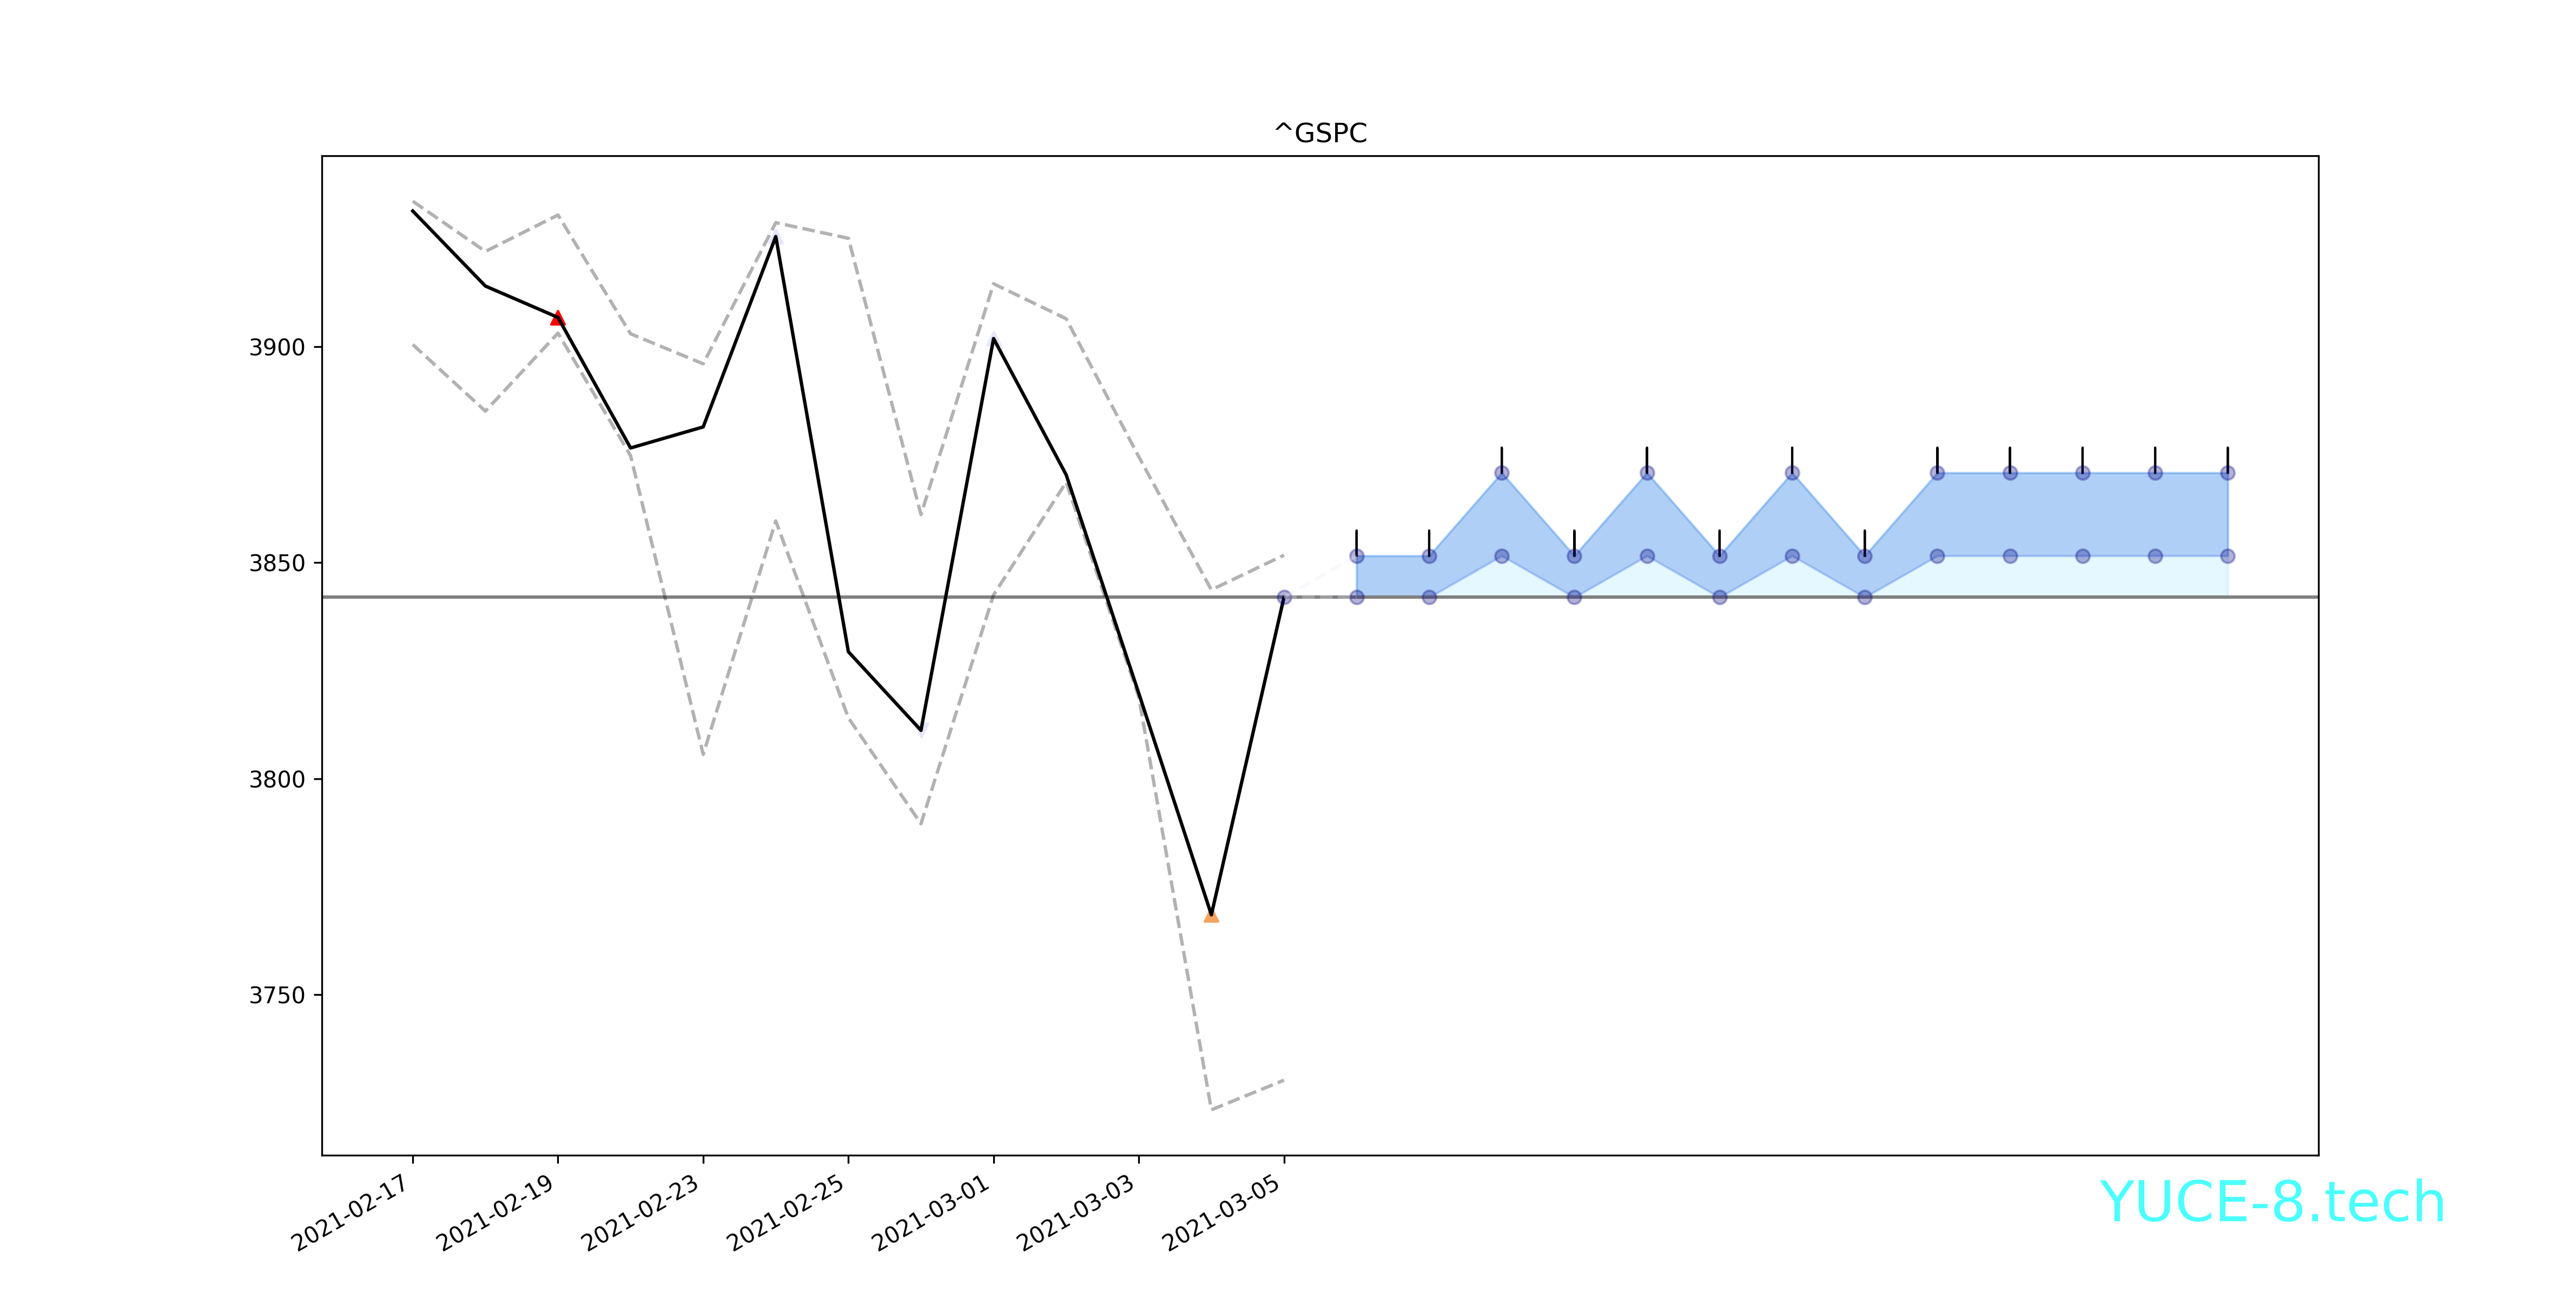

In [32]:
URL = "https://us-central1-yuce-8-v1.cloudfunctions.net/yuce_8_alpha_2_api_get_image?symbol=%5EGSPC&interval=1d&key=" + key

import IPython.display as Disp
Disp.Image(requests.get(URL).content)

## Get backtesting statistics

In [17]:
def get_backtest_statistics(key):
   req = yuce_8.push(
      {
        'action': 'get_backtest_statistics',
        'key': key
      }, return_result=True)
   if req.status_code == 200:
     return req.json()['msg']['results'], req.json()['msg']['api_calls_left_with_this_key'] 
   else:
     return ';-( ' + req.json()['msg'], -1

# pull the backtesting results:
results, calls_left = get_backtest_statistics(key)
print(calls_left)
print(results)

48
[{'confidence intervals 80%': [[1.0119737250975562, 1.0224088566132592], [1.0194027968236177, 1.031950657766226], [1.0271191088016551, 1.0418091329280812], [1.0349168981309629, 1.0515265260938906], [1.0428201757506546, 1.0614247716828171], [1.0513494152350937, 1.0721964698509658], [1.06010200093362, 1.0829448549928937], [1.0693916111865993, 1.0942171782573704], [1.0789990094844497, 1.105683121329149], [1.0888714411759877, 1.1174435994123912], [1.0985568042398057, 1.129230452001039], [1.1077055488578869, 1.1404262031562733], [1.1172689163237046, 1.151989105984645]], 'confidence intervals 95%': [[1.0091870467057482, 1.0251955350050672], [1.0160519187920798, 1.035301535797764], [1.0231961709118311, 1.0457320708179052], [1.030481334355786, 1.0559620898690676], [1.0378518602680504, 1.0663930871654212], [1.0457822562066263, 1.0777636288794332], [1.05400186815442, 1.0890449877720936], [1.0627619993588622, 1.1008467900851076], [1.0718730774566347, 1.112809053356964], [1.0812413106074474, 1.

# Upload custom intraday data and execute a forecast
if you own intraday data then you can upload the delta between Y-8 database and your own latest data. With this latest data you can execute a forecast based on your own intraday data.


## Step #1: Check the latest date available in Y-8 database

In [18]:
def get_last_date_and_close_of_y8(key, symbol, interval):
   req = yuce_8.push(
      {
        'action': 'get_last_entry',
        'key': key,
        'symbol': symbol,
        'interval': interval
      }, return_result=True)
   if req.status_code == 200:
     return req.json()['msg']['results']['last_date'], req.json()['msg']['results']['last_close'], req.json()['msg']['api_calls_left_with_this_key'] 
   else:
     return ';-( ' + req.json()['msg'], 'hmm....', -1

last_date, last_close, calls_left = get_last_date_and_close_of_y8(key, 'BTC-USD', '4hour')
print(last_date, ' -> ', last_close)

2021-03-06T00:00:00.000000000  ->  48980.38


## Step #2: Upload the missing datapoints and execute the forecast

create some missing candles first...

In [19]:
import datetime

missing_candles = []
def add_candle(timestamp, open_, high, low, close, adj_close, volume):
    global missing_candles
    missing_candles.append({'Date': timestamp, 'Open': open_, 'High': high, 'Low': low, 'Close': close, 'Adj Close': adj_close, 'Volume': volume})

# please replace the following fake data with your own datapoints
last_date_dt = datetime.datetime.strptime(last_date.replace('T', ' ')[:len('2021-03-04T00:00:00')], '%Y-%m-%d %H:%M:%S')
for i in range(0, 10):
  last_date_dt = last_date_dt + datetime.timedelta(hours=4)
  add_candle(last_date_dt.strftime("%Y-%m-%d %H:%M:%S"), 10, 12, 10, 10, 10, 100)
  print('added candle: ', missing_candles[-1])




added candle:  {'Date': '2021-03-06 04:00:00', 'Open': 10, 'High': 12, 'Low': 10, 'Close': 10, 'Adj Close': 10, 'Volume': 100}
added candle:  {'Date': '2021-03-06 08:00:00', 'Open': 10, 'High': 12, 'Low': 10, 'Close': 10, 'Adj Close': 10, 'Volume': 100}
added candle:  {'Date': '2021-03-06 12:00:00', 'Open': 10, 'High': 12, 'Low': 10, 'Close': 10, 'Adj Close': 10, 'Volume': 100}
added candle:  {'Date': '2021-03-06 16:00:00', 'Open': 10, 'High': 12, 'Low': 10, 'Close': 10, 'Adj Close': 10, 'Volume': 100}
added candle:  {'Date': '2021-03-06 20:00:00', 'Open': 10, 'High': 12, 'Low': 10, 'Close': 10, 'Adj Close': 10, 'Volume': 100}
added candle:  {'Date': '2021-03-07 00:00:00', 'Open': 10, 'High': 12, 'Low': 10, 'Close': 10, 'Adj Close': 10, 'Volume': 100}
added candle:  {'Date': '2021-03-07 04:00:00', 'Open': 10, 'High': 12, 'Low': 10, 'Close': 10, 'Adj Close': 10, 'Volume': 100}
added candle:  {'Date': '2021-03-07 08:00:00', 'Open': 10, 'High': 12, 'Low': 10, 'Close': 10, 'Adj Close': 10,

now upload the missing candles and run a forecast based on your own data

In [20]:
import json

def get_instant_forecast(key, symbol, interval, missing_candles):
   req = yuce_8.push(
      {
        'action': 'run_instant_forecast',
        'key': key,
        'symbol': symbol,
        'interval': interval,
        'candles': missing_candles
      }, return_result=True)
   if req.status_code == 200:
     return json.loads(req.json()['f_0']['msg']['result'])['yuce_8'], req.json()['msg']['api_calls_left_with_this_key']
   else:
     return ';-( ' + req.json()['msg'], -1

# get the forecast:
f_0, calls_left = get_instant_forecast(key, 'BTC-USD', '4hour', missing_candles)

print(f_0)


KeyError: ignored

In [ ]:
x = f_0['msg']
calls_left = f_0['msg']['api_calls_left_with_this_key'] 

print(calls_left)
y = x['f_0']['result']
print(y)

import json
x = json.loads(y)
x['yuce_8']


# DISCLAIMER

**THIS IS FOR EDUCATIONAL / RESEARCH & DEVELOPMENT PURPOSES ONLY!**


The information on this site is provided by YUCE-8 and the author and it is not to be construed as an offer or solicitation for the purchase or sale of any financial instrument or the provision of an offer to provide investment services. Information, opinions and comments contained on this site are not under the scope of investment advisory services. Investment advisory services are given according to the investment advisory contract, signed between the intermediary institutions, portfolio management companies, investment banks and the clients. Opinions and comments contained in this site reflect the personal views of the analysts / AI algorithms who supplied them. The investments discussed or recommended in this report may involve significant risk, may be illiquid and may not be suitable for all investors. Therefore, making decisions with respect to the information in this report may cause inappropriate results and a total loss.
Futures and forex trading contains substantial risk and is not for every investor. An investor could potentially lose all or more than the initial investment. Risk capital is money that can be lost without jeopardizing ones’ financial security or life style. Only risk capital should be used for trading and only those with sufficient risk capital should consider trading. Past performance is not necessarily indicative of future results
Hypothetical performance results have many inherent limitations, some of which are described below. no representation is being made that any account will or is likely to achieve profits or losses similar to those shown; in fact, there are frequently sharp differences between hypothetical performance results and the actual results subsequently achieved by any particular trading program. One of the limitations of hypothetical performance results is that they are generally prepared with the benefit of hindsight. In addition, hypothetical trading does not involve financial risk, and no hypothetical trading record can completely account for the impact of financial risk of actual trading. for example, the ability to withstand losses or to adhere to a particular trading program in spite of trading losses are material points which can also adversely affect actual trading results. There are numerous other factors related to the markets in general or to the implementation of any specific trading program which cannot be fully accounted for in the preparation of hypothetical performance results and all which can adversely affect trading results.
Testimonials appearing on this website may not be representative of other clients or customers and is not a guarantee of future performance or success.



No Investment Advice & No Reliance
YUCE-8 IS A DATA ANALYTICS SERVICE. YUCE-8 IS NO BROKER/DEALER, WE ARE NOT AN INVESTMENT ADVISOR, WE HAVE NO ACCESS TO NON-PUBLIC INFORMATION ABOUT PUBLICLY TRADED COMPANIES, AND THIS IS NOT A PLACE FOR THE GIVING OR RECEIVING OF FINANCIAL ADVICE, ADVICE CONCERNING INVESTMENT DECISIONS OR TAX OR LEGAL ADVICE. WE ARE NOT REGULATED BY THE SEC OR ANY FINANCIAL SERVICES AUTHORITY. 
ACCORDINGLY, YUCE-8 WILL NOT BE LIABLE, WHETHER IN CONTRACT, TORT (INCLUDING NEGLIGENCE) OR OTHERWISE, IN RESPECT OF ANY DAMAGE, EXPENSE OR OTHER LOSS YOU MAY SUFFER ARISING OUT OF SUCH INFORMATION OR ANY RELIANCE YOU MAY PLACE UPON SUCH INFORMATION. ANY ARRANGEMENTS BETWEEN YOU AND ANY THIRD PARTY CONTACTED VIA THE WEBSITE ARE AT YOUR SOLE RISK.